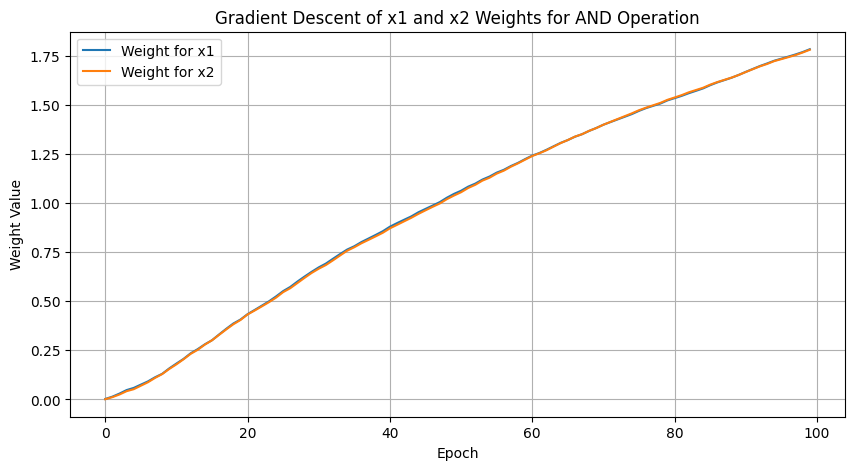

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score

# Define the AND dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])  # AND operator

# Initialize a single neuron model using SGDClassifier
model = SGDClassifier(loss="log_loss", max_iter=1, learning_rate="constant", eta0=0.1, tol=None)
n_epochs = 100  # number of training iterations
weights, biases = [], []  # Lists to store weight and bias values per epoch

# Training loop
for _ in range(n_epochs):
    model.partial_fit(X, y, classes=np.array([0, 1]))  # Train one epoch
    weights.append(model.coef_.flatten().copy())       # Record weights
    biases.append(model.intercept_[0])                 # Record bias

# Convert recorded weights and biases to numpy arrays for easier plotting
weights = np.array(weights)
biases = np.array(biases)

# Plotting the gradient descent path for weights x1 and x2
plt.figure(figsize=(10, 5))
plt.plot(weights[:, 0], label="Weight for x1")
plt.plot(weights[:, 1], label="Weight for x2")
plt.xlabel("Epoch")
plt.ylabel("Weight Value")
plt.title("Gradient Descent of x1 and x2 Weights for AND Operation")
plt.legend()
plt.grid(True)
plt.show()


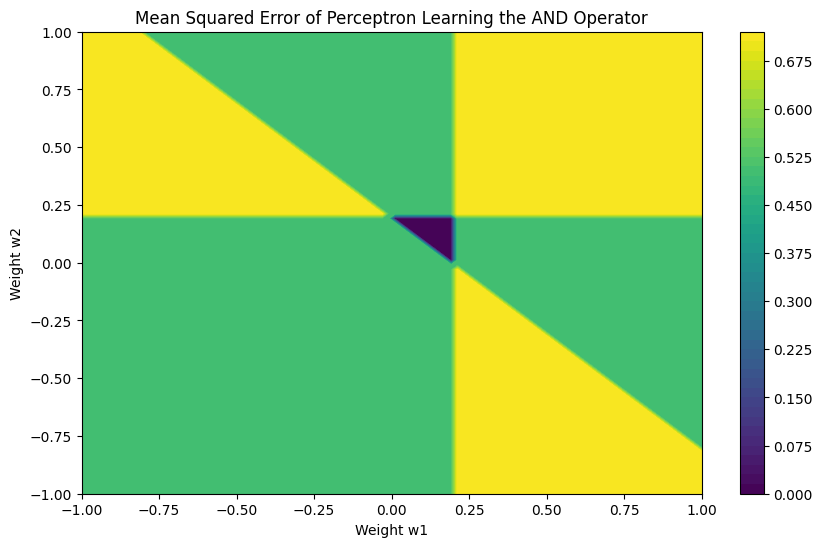

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Define the AND truth table
inputs = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
outputs = np.array([0, 0, 0, 1])

# Parameters
learning_rate = 0.1
num_epochs = 100
w1_range = np.linspace(-1, 1, 100)
w2_range = np.linspace(-1, 1, 100)

# Initialize weights
w1 = 0.0
w2 = 0.0
b = 0

# Function to compute the perceptron output
def perceptron_output(x1, x2, w1, w2, b):
    return 1 if (w1 * x1 + w2 * x2 + b) > 0 else 0

# Train the perceptron
for epoch in range(num_epochs):
    for x, target in zip(inputs, outputs):
        x1, x2 = x
        prediction = perceptron_output(x1, x2, w1, w2, b)
        error = target - prediction
        # Update weights and bias
        w1 += learning_rate * error * x1
        w2 += learning_rate * error * x2
        b += learning_rate * error

# Function to compute error for a grid of weights
def compute_error(w1_range, w2_range):
    error_grid = np.zeros((len(w1_range), len(w2_range)))
    for i, w1 in enumerate(w1_range):
        for j, w2 in enumerate(w2_range):
            total_error = 0
            for x, target in zip(inputs, outputs):
                prediction = perceptron_output(x[0], x[1], w1, w2, b)
                total_error += (target - prediction) ** 2
            error_grid[i, j] = np.sqrt(total_error / len(outputs))  # Root Mean squared error
    return error_grid

# Compute the error grid
error_grid = compute_error(w1_range, w2_range)

# Plot the error surface
W1, W2 = np.meshgrid(w1_range, w2_range)
plt.figure(figsize=(10, 6))
contour = plt.contourf(W1, W2, error_grid.T, levels=50, cmap='viridis')
plt.colorbar(contour)
plt.title('Error Surface for Weights w1 and w2')
plt.xlabel('Weight w1')
plt.ylabel('Weight w2')
plt.title('Mean Squared Error of Perceptron Learning the AND Operator')
plt.show()


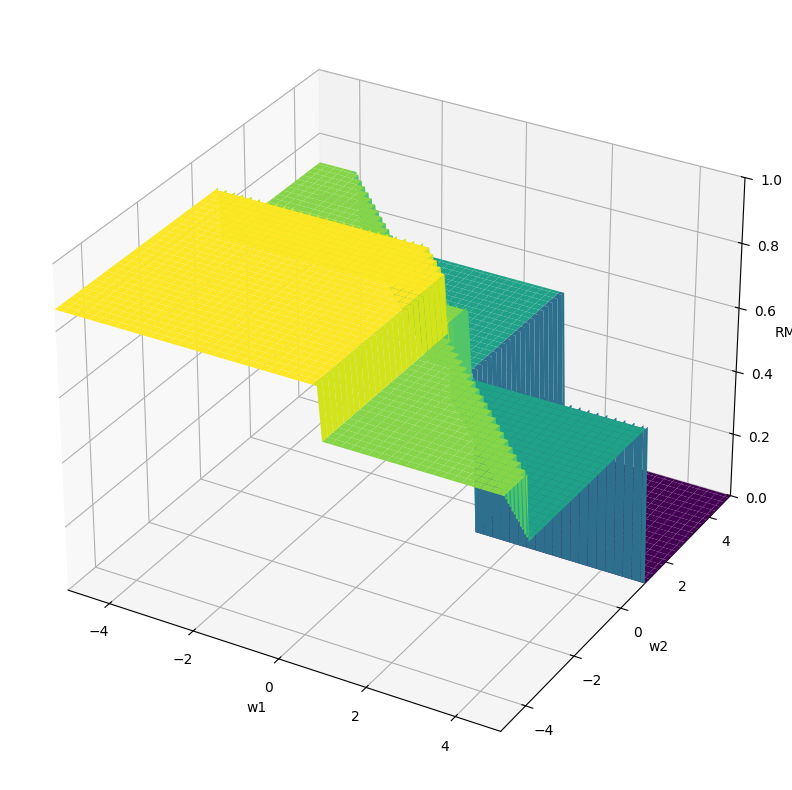

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# AND operator inputs and outputs
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])  # Target outputs for OR

# Sigmoid activation function
def sigmoid(x, b):
    return np.heaviside(x, 1)
    # return 1 / (1 + np.exp(-x))

# Perceptron output
def perceptron_output(X, w1, w2, b):
    z = w1 * X[:, 0] + w2 * X[:, 1] + b
    return sigmoid(z, b)

# Function to calculate error
def calculate_error(w1, w2, b):
    predictions = perceptron_output(X, w1, w2, b)
    predictions = np.round(predictions)  # Convert probabilities to binary
    return np.sqrt(np.mean((predictions - y) ** 2))  # Mean Squared Error

# Generate weight grid
w1_range = np.linspace(-5, 5, 100)
w2_range = np.linspace(-5, 5, 100)
b = -1 # Bias value, can be adjusted
W1, W2 = np.meshgrid(w1_range, w2_range)
# Calculate error for each weight combination
errors = np.zeros(W1.shape)


for i in range(W1.shape[0]):
    for j in range(W1.shape[1]):
        errors[i, j] = calculate_error(W1[i, j], W2[i, j], b)

# Plotting
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(W1, W2, errors, cmap='viridis', edgecolor='none')
ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlim([0, 1])
ax.set_xlim([-5, 5])
ax.set_ylim([-5, 5])
ax.set_zlabel('RMSE')
fig.tight_layout()
plt.show()
